# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros


## Limpeza e Transformação

Em problemas reais, dificilmente todos os dados se encontrarão no formato que nós desejamos. Dados reais são bagunçados e o caminho para limpá-los e deixá-los prontos para análises pode ser longo. Entretanto, este esforço é fundamental, pois lembrem-se, em uma análise "garbage-in garbage-out" (se entra lixo, sai lixo).

## Transformando tipos

Uma das transformações mais comuns nos dados é a conversão de tipos. Ela é necessária quando um dataset traz, por exemplo, um número representado por string (ou vice-versa), ou um float que poderia ser um inteiro, entre outros.

Abaixo vamos usar um dataset com dados de jogadores da NBA. Nele, a coluna `age` é representada através de um float, mas as idades são todas inteiras.

In [18]:
import pandas as pd

In [114]:
nba_df = pd.read_csv("../datasets/nbaplayers.csv")

In [108]:
nba_df.head(5)

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


Para converter o tipo de uma coluna no Pandas usamos a função `astype`, passando um dicionário com os nomes das colunas como chave e o novo tipo como valor. A função retorna o DataFrame com os tipos modificados:

In [109]:
nba_df.astype({"age":  int})

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20
11141,11141,Melvin Frazier Jr.,ORL,23,195.58,97.522280,Tulane,USA,2018,2,...,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20
11142,11142,Meyers Leonard,MIA,28,213.36,117.933920,Illinois,USA,2012,1,...,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20
11143,11143,Norvel Pelle,PHI,27,208.28,104.779752,None,USA,Undrafted,Undrafted,...,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20


É comum precisarmos converter colunas que representa datas. Nos datasets, as datas costumam aparecer como um string, mas as linguagens de programação normalmente tem alguma estrutura específica para representar esse tipo de dado.

No dataset com os dados dos filmes, temos a coluna `Release Data` que está representada como string:

In [94]:
df = pd.read_csv("../datasets/movies.csv")
df.head(5)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0


In [95]:
type(df["Release Date"][0])

str

Para converter uma coluna para um tipo específico para data, podemos usar a função `to_datetime` do Pandas.

Mas, antes disso, precisamos filtrar os dados da coluna `Release Date`, pois existem alguns filmes que não tem data de lançamento especificada, o valor da coluna para esses filmes é o string "TBD".

In [96]:
non_tbd_dates = df["Release Date"][df["Release Date"] != "TBD"]

Convertendo, temos:

In [97]:
non_tbd_dates = pd.to_datetime(non_tbd_dates)

In [98]:
non_tbd_dates

0      1998-06-12
1      1998-08-07
2      1998-08-28
3      1998-09-11
4      1998-10-09
          ...    
3196   2008-10-31
3197   2007-03-02
3198   2006-08-11
3199   2005-10-28
3200   1998-07-17
Name: Release Date, Length: 3194, dtype: datetime64[ns]

In [103]:
df["Release Date"] = non_tbd_dates

In [105]:
df["Release Date"][0]

Timestamp('1998-06-12 00:00:00')

Os valores que tinham "TBD" recebem o valor NaT - Not a Time:

In [106]:
df["Release Date"][267]

NaT

## Redimensionando

Valores numéricos podem ser representados em várias unidades. Uma distância pode ser representada em metros, centímetros, quilômetros, etc. Massa pode ser representada por gramas, quilogramas, etc. Um valor monetário pode ser representado em dólares, reais, euros, etc. Além disso, podemos ter valores grandes representados como centenas, milhares ou milhões de uma determinada unidade.

Como diversas técnicas são sensíveis a escala dos dados, redimensioná-los pode ser fundamental para que sejam usadas grandezas sem grandes distorções.

Um tipo simples de conversão de unidades pode ser feito com operações aritméticas. No dataset dos jogadores de basquete, a altura é dada em centímetros. Vamos converter essa coluna para metros:

In [115]:
nba_df["player_height"] = nba_df["player_height"] / 100
nba_df["player_height"]

0        1.9812
1        2.1590
2        2.0574
3        2.0320
4        2.0574
          ...  
11140    2.0828
11141    1.9558
11142    2.1336
11143    2.0828
11144    1.9304
Name: player_height, Length: 11145, dtype: float64

Algumas distribuições possum uma cauda muito maior de um lado do que do outro, concentrando grande parte dos valores no lado oposto da cauda longa. Vejam o exemplo da coluna `"US Gross"` do dataset dos filmes:

In [116]:
import seaborn as sns

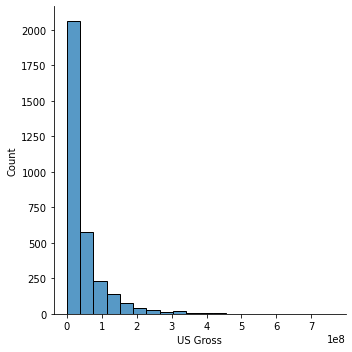

In [117]:
sns.displot(df, x="US Gross", bins=20)

Neste caso, podemos calcular o logaritmo dos valores para reduzir a diferença desproporcional dos valores mais altos em relação aos mais baixos.

Primeiro, vamos filtrar a coluna para trabalharmos apenas com os valores maiores que zero:

In [119]:
df_usgross = df[df["US Gross"] > 0].copy()

Calculando o `log10` de todos os valores:

In [120]:
import numpy as np

df_usgross["Log Us Gross"] = np.log10(df_usgross["US Gross"])

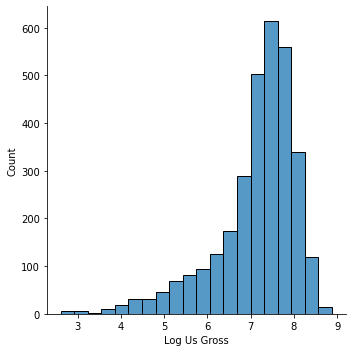

In [121]:
sns.displot(df_usgross, x="Log Us Gross", bins=20)

Notem que, por exemplo, um valor 7 no eixo X significa $10^7$.

Podemos checar o resultado analisando os valores do DataFrame:

In [124]:
df_usgross.sort_values("US Gross", ascending=False).head(5)

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes,Log Us Gross
1234,Avatar,760167650.0,2.767891e+09,146153933.0,237000000.0,2009-12-18,PG-13,NaN,20th Century Fox,Original Screenplay,Action,Science Fiction,James Cameron,83.0,8.3,261439.0,8.880909
2970,Titanic,600788188.0,1.842880e+09,NaN,200000000.0,1997-12-19,PG-13,194.0,Paramount Pictures,Original Screenplay,Thriller/Suspense,Historical Fiction,James Cameron,82.0,7.4,240732.0,8.778721
1266,The Dark Knight,533345358.0,1.022345e+09,234119058.0,185000000.0,2008-07-18,PG-13,152.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Super Hero,Christopher Nolan,93.0,8.9,465000.0,8.727009
912,Star Wars Ep. IV: A New Hope,460998007.0,7.979000e+08,11182540.0,11000000.0,1977-05-25,PG,NaN,20th Century Fox,Original Screenplay,Adventure,Science Fiction,George Lucas,NaN,NaN,NaN,8.663699
2741,Shrek 2,441226247.0,9.198388e+08,NaN,70000000.0,2004-05-19,PG,92.0,Dreamworks SKG,Based on Book/Short Story,Adventure,Kids Fiction,Andrew Adamson,89.0,7.5,95658.0,8.644661


Outros exemplos que costumam seguir esse tipo de distribuição: população das cidades, frequência de palavras, distribuição de riqueza, entre outros.

De forma mais abrangente, podemos uniformizar os dados utilizando o z-score, para ter dados com média zero e desvio padrão 1. Isto torna diferentes unidades comparáveis.

Usando a função `zscore` do SciPy, temos o resultado abaixo. O parâmetro `nan_policy` com valor `"omit"` é utilizado para ignorar os valores que faltam na coluna `"US Gross"`.

In [133]:
from scipy.stats import zscore
zscore(df["US Gross"], nan_policy="omit")

array([-0.70118537, -0.70334711, -0.70027322, ..., -0.51183135,
        0.02515369,  0.79664637])

## Dados Faltantes

Outro problema que é comum em dados do mundo real não são completos, ou seja, faltam registros que não foram coletados ou se perderam.

O Pandas considera None, NaN ou NaT como representações de valores nulos ou faltantes. As Series e os DataFrames possuem métodos para detectar e tratar esse tipo de problema.

O método `isnull` retorna uma máscara booleana indicando onde estão os dados faltantes:

In [137]:
data = pd.Series([1, np.nan, "hello", None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

O método `notnull` retorna uma máscara booleana indicando onde estão os dados não faltantes:

In [138]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [139]:
data[data.notnull()]

0        1
2    hello
dtype: object

A maneira mais fácil de lidar com dados faltantes é remover os registros que contenham dados faltantes. Se após a remoção o dataset ainda possuir muitos registros, essa abordagem pode ser adequada.

Usamos o método `dropna` para remover os registros com dados faltantes:

In [140]:
data.dropna()

0        1
2    hello
dtype: object

Para os DataFrames, o `dropna` exclui toda a linha se existir um dado faltante em uma das suas colunas:

In [142]:
df = pd.DataFrame([[1, np.nan, 2], [2,3,5], [np.nan, 6, 7]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,6.0,7


In [143]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Usando o parâmetro `axis` podemos especificar que a coluna deve ser excluido ao invés da linha:

In [144]:
df.dropna(axis="columns")

,2
0,2
1,5
2,7


Para não descartar registros, podemos estimar ou imputar os dados faltantes. A seguir vamos ver três estratégias.

Com o método `fillna` podemos substituir os dados faltantes, sendo uma maneira simples, substitui-los por zero:

In [146]:
data = pd.Series([1, np.nan, 2, None, 3])

data.fillna(0)

0    1.0
1    0.0
2    2.0
3    0.0
4    3.0
dtype: float64

Note que o zero pode ser uma representação ruim em diversos casos. Por exemplo, um dado faltante em uma coluna salário, se preenchido com zero, está representando que uma pessoa está desempregada (sem salário). Entretanto, o dado faltante pode ter sido por que a pessoa não respondeu quanto ganha.

Usando o parâmetro `method="ffill"`, o método `fillna` vai preencher um dado faltante com o valor da linha anterior:

In [147]:
data.fillna(method="ffill")

0    1.0
1    1.0
2    2.0
3    2.0
4    3.0
dtype: float64

Usando o parâmetro `method="ffill"`, o método `fillna` vai preencher um dado faltante com o valor da linha posterior:

In [148]:
data.fillna(method="bfill")

0    1.0
1    2.0
2    2.0
3    3.0
4    3.0
dtype: float64

Podemos também substituir o valor pela média dos valores da coluna:

In [150]:
data.fillna(data.mean())

0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
dtype: float64